In [3]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


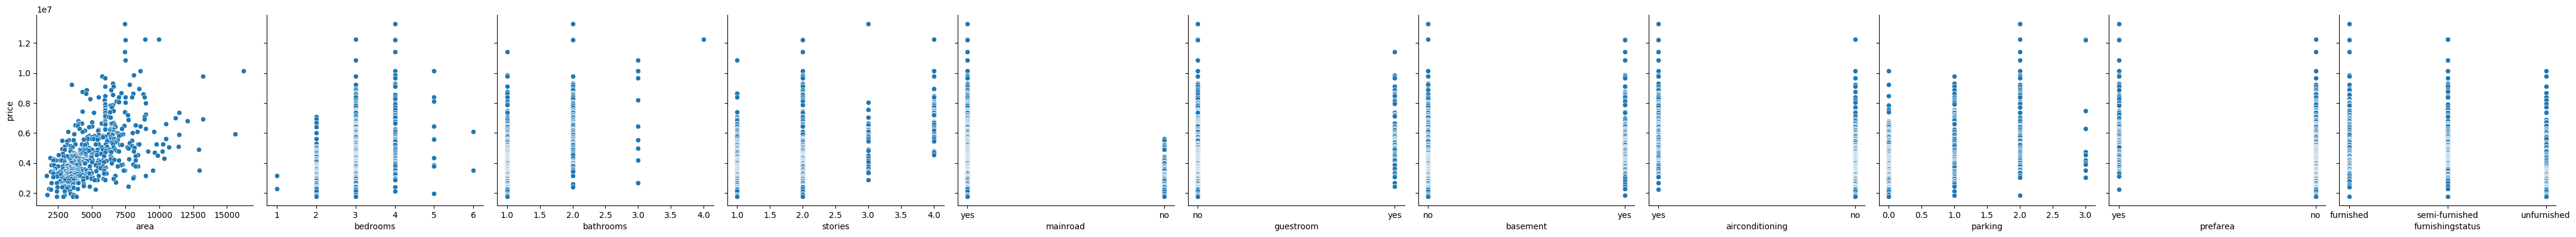

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.6398925925775983
Mean Squared Error (MSE): 1069066496193.4844
R² Score: 0.6303986769678395
Model Coefficients: [-7.94442826e+18 -7.94442826e+18  1.49840686e+20  1.49840686e+20
 -1.20609387e+19 -1.20609387e+19  1.66477947e+19  1.66477947e+19
 -1.42191045e+18 -1.42191045e+18 -6.01016201e+19 -6.78142774e+19
 -6.45115806e+19  5.03329001e+05  1.06418507e+05  4.51104288e+05
  4.81170429e+05  2.52416000e+05]
Intercept: 4741572.587445402


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 647, in fit
    self.coef_ = optimize.nnls(X, y)[0]
  File "/usr/local/lib/python3.10/dist-p

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('Housing.csv')


X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'airconditioning', 'parking','basement',
          'prefarea', 'furnishingstatus']]
y = data['price']

ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['mainroad', 'guestroom','basement',
                                    'airconditioning',
                                   'prefarea', 'furnishingstatus'])],
    remainder='passthrough')
X = ct.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)


sns.pairplot(data, x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
          'basement', 'airconditioning', 'parking',
          'prefarea', 'furnishingstatus'],
             y_vars='price', height=4, kind='scatter')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)


model = LinearRegression()

param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}


random_search = RandomizedSearchCV(model, param_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")


print(f"Best Score: {random_search.best_score_}")


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}